# **El Salvador´s GDP by Industry**

In this excersice we build a Heat Map using GDP constant prices growth rate published anually by BCR EL Salvador. Our objective is to observe long run changes in the main pillars of the economy.

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
#entrada de datos
df=pd.read_csv("https://raw.githubusercontent.com/AaronGue001/El-Salvador-HeatMap_GDP-by-Industry/refs/heads/main/PIB_PreciosConstantes_El%20Salvador.csv")

In [130]:
df.head(25)

,Sector económico,2005,2006,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Agricultura, ganadería, silvicultura y pesca",ND,2.78,7.11,-0.19,-5.32,5.01,-4.18,4.36,-7.20,...,-5.50,8.36,0.66,-2.72,1.04,-4.37,3.19,-0.71,-0.57,0.95
1,Explotación de minas y canteras,ND,-2.14,3.80,-11.80,-17.46,-4.43,18.21,-7.05,8.30,...,-5.38,3.89,1.25,5.44,4.85,-10.33,4.60,2.16,3.01,-2.35
2,Industrias manufactureras,ND,2.89,2.11,5.41,-4.14,1.88,4.17,1.50,0.79,...,3.05,1.31,1.27,0.48,1.95,-14.15,11.74,-3.04,-3.98,-0.24
3,"Suministro de electricidad, gas, vapor y aire ...",ND,12.97,1.51,13.28,-10.05,4.07,5.20,0.31,-3.86,...,-0.26,0.37,0.62,-3.59,9.08,12.94,3.33,6.26,10.88,0.90
4,"Suministro de agua, alcantarillados y gestión ...",ND,-1.11,14.61,-3.67,-2.45,-3.04,7.19,8.33,4.79,...,-4.46,-6.73,6.69,1.57,0.47,3.29,13.87,3.06,0.49,2.92
5,Construcción,ND,6.64,2.00,3.67,-8.96,6.37,13.40,4.41,3.22,...,-0.50,2.87,5.58,7.12,9.30,-17.81,6.63,12.57,18.19,1.06
6,"Comercio, reparación de vehículos automotores ...",ND,4.71,-0.12,-6.52,3.35,-0.17,0.79,5.93,6.31,...,0.98,0.19,1.53,4.21,2.48,-13.37,18.84,1.04,1.62,2.59
7,Transporte y almacenamiento,ND,2.94,0.43,-1.98,-10.51,3.86,7.10,2.77,6.12,...,13.26,11.06,2.83,-2.67,4.66,-13.52,18.86,3.54,1.67,2.66
8,Actividades de alojamiento y de servicio de co...,ND,0.98,4.62,5.16,-6.85,5.52,7.80,5.68,4.20,...,1.01,5.03,1.36,6.24,2.77,-18.89,21.55,5.15,1.99,6.38
9,Información y comunicaciones,ND,0.46,6.33,-1.51,-4.33,5.83,4.98,-5.60,-0.91,...,2.66,4.64,0.29,5.87,1.22,-3.21,15.04,3.17,4.37,-1.13


In [132]:
df.shape

(24, 21)

In [133]:
rows_remove=[19,20,21,22]
columns_remove=["2005"]
df=df.drop(rows_remove,axis=0)
df=df.drop(columns_remove,axis=1)

In [134]:
df.head(23)

,Sector económico,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,"Agricultura, ganadería, silvicultura y pesca",2.78,7.11,-0.19,-5.32,5.01,-4.18,4.36,-7.20,0.87,-5.50,8.36,0.66,-2.72,1.04,-4.37,3.19,-0.71,-0.57,0.95
1,Explotación de minas y canteras,-2.14,3.80,-11.80,-17.46,-4.43,18.21,-7.05,8.30,-4.24,-5.38,3.89,1.25,5.44,4.85,-10.33,4.60,2.16,3.01,-2.35
2,Industrias manufactureras,2.89,2.11,5.41,-4.14,1.88,4.17,1.50,0.79,2.52,3.05,1.31,1.27,0.48,1.95,-14.15,11.74,-3.04,-3.98,-0.24
3,"Suministro de electricidad, gas, vapor y aire ...",12.97,1.51,13.28,-10.05,4.07,5.20,0.31,-3.86,6.95,-0.26,0.37,0.62,-3.59,9.08,12.94,3.33,6.26,10.88,0.90
4,"Suministro de agua, alcantarillados y gestión ...",-1.11,14.61,-3.67,-2.45,-3.04,7.19,8.33,4.79,-10.56,-4.46,-6.73,6.69,1.57,0.47,3.29,13.87,3.06,0.49,2.92
5,Construcción,6.64,2.00,3.67,-8.96,6.37,13.40,4.41,3.22,-1.53,-0.50,2.87,5.58,7.12,9.30,-17.81,6.63,12.57,18.19,1.06
6,"Comercio, reparación de vehículos automotores ...",4.71,-0.12,-6.52,3.35,-0.17,0.79,5.93,6.31,3.98,0.98,0.19,1.53,4.21,2.48,-13.37,18.84,1.04,1.62,2.59
7,Transporte y almacenamiento,2.94,0.43,-1.98,-10.51,3.86,7.10,2.77,6.12,-7.06,13.26,11.06,2.83,-2.67,4.66,-13.52,18.86,3.54,1.67,2.66
8,Actividades de alojamiento y de servicio de co...,0.98,4.62,5.16,-6.85,5.52,7.80,5.68,4.20,2.74,1.01,5.03,1.36,6.24,2.77,-18.89,21.55,5.15,1.99,6.38
9,Información y comunicaciones,0.46,6.33,-1.51,-4.33,5.83,4.98,-5.60,-0.91,-0.51,2.66,4.64,0.29,5.87,1.22,-3.21,15.04,3.17,4.37,-1.13


In [135]:
df["Sector económico"].unique()

array(['Agricultura, ganadería, silvicultura y pesca     ',
       'Explotación de minas y canteras     ',
       'Industrias manufactureras     ',
       'Suministro de electricidad, gas, vapor y aire acondicionado     ',
       'Suministro de agua, alcantarillados y gestión de desechos     ',
       'Construcción     ',
       'Comercio, reparación de vehículos automotores y motocicletas     ',
       'Transporte y almacenamiento     ',
       'Actividades de alojamiento y de servicio de comidas     ',
       'Información y comunicaciones     ',
       ' Actividades financieras y de seguros     ',
       'Actividades inmobiliarias     ',
       'Actividades profesionales, científicas y técnicas     ',
       'Actividades de servicios administrativos y de apoyo     ',
       'Administración pública y defensa, planes de seguridad social y de afiliación obligatoria     ',
       'Enseñanza     ',
       'Actividades de atención de la salud humana y de asistencia social     ',
       'Ac

In [136]:
Sector_económico_replace={'Agricultura, ganadería, silvicultura y pesca     ':"Agropecuario",
       'Explotación de minas y canteras     ':"Minas y canteras",
       'Industrias manufactureras     ':"Industrias",
       'Suministro de electricidad, gas, vapor y aire acondicionado     ':"Electricidad",
       'Suministro de agua, alcantarillados y gestión de desechos     ':"Suministro de agua",
       'Construcción     ':"Construcción",
       'Comercio, reparación de vehículos automotores y motocicletas     ':"Comercio",
       'Transporte y almacenamiento     ':"Transporte",
       'Actividades de alojamiento y de servicio de comidas     ':"Alojamiento",
       'Información y comunicaciones     ':"Información y comunicaciones",
       ' Actividades financieras y de seguros     ':"Financiero y seguros",
       'Actividades inmobiliarias     ':"Inmobiliario",
       'Actividades profesionales, científicas y técnicas     ':"Actividades profesionales",
       'Actividades de servicios administrativos y de apoyo     ':"Servicios administrativos",
       'Otras actividades de servicios     ':"Otros servicios",
       'Administración pública y defensa, planes de seguridad social y de afiliación obligatoria     ':"Administración pública",
       'Enseñanza     ':"Enseñanza",
       'Actividades de atención de la salud humana y de asistencia social     ':"Salud",
       'Actividades Artísticas, de entretenimiento y recreativas     ':"Esparcimiento",
       'Otras actividades de servicios     ':"Otros servicios",
       'Producto Interno Bruto por enfoque de la producción     ':"PIB"}

df['Sector económico'] = df['Sector económico'].replace(Sector_económico_replace)




In [137]:
df["Sector económico"].unique()

array(['Agropecuario', 'Minas y canteras', 'Industrias', 'Electricidad',
       'Suministro de agua', 'Construcción', 'Comercio', 'Transporte',
       'Alojamiento', 'Información y comunicaciones',
       'Financiero y seguros', 'Inmobiliario',
       'Actividades profesionales', 'Servicios administrativos',
       'Administración pública', 'Enseñanza', 'Salud', 'Esparcimiento',
       'Otros servicios', 'PIB'], dtype=object)

In [138]:
df.head(23)

,Sector económico,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Agropecuario,2.78,7.11,-0.19,-5.32,5.01,-4.18,4.36,-7.20,0.87,-5.50,8.36,0.66,-2.72,1.04,-4.37,3.19,-0.71,-0.57,0.95
1,Minas y canteras,-2.14,3.80,-11.80,-17.46,-4.43,18.21,-7.05,8.30,-4.24,-5.38,3.89,1.25,5.44,4.85,-10.33,4.60,2.16,3.01,-2.35
2,Industrias,2.89,2.11,5.41,-4.14,1.88,4.17,1.50,0.79,2.52,3.05,1.31,1.27,0.48,1.95,-14.15,11.74,-3.04,-3.98,-0.24
3,Electricidad,12.97,1.51,13.28,-10.05,4.07,5.20,0.31,-3.86,6.95,-0.26,0.37,0.62,-3.59,9.08,12.94,3.33,6.26,10.88,0.90
4,Suministro de agua,-1.11,14.61,-3.67,-2.45,-3.04,7.19,8.33,4.79,-10.56,-4.46,-6.73,6.69,1.57,0.47,3.29,13.87,3.06,0.49,2.92
5,Construcción,6.64,2.00,3.67,-8.96,6.37,13.40,4.41,3.22,-1.53,-0.50,2.87,5.58,7.12,9.30,-17.81,6.63,12.57,18.19,1.06
6,Comercio,4.71,-0.12,-6.52,3.35,-0.17,0.79,5.93,6.31,3.98,0.98,0.19,1.53,4.21,2.48,-13.37,18.84,1.04,1.62,2.59
7,Transporte,2.94,0.43,-1.98,-10.51,3.86,7.10,2.77,6.12,-7.06,13.26,11.06,2.83,-2.67,4.66,-13.52,18.86,3.54,1.67,2.66
8,Alojamiento,0.98,4.62,5.16,-6.85,5.52,7.80,5.68,4.20,2.74,1.01,5.03,1.36,6.24,2.77,-18.89,21.55,5.15,1.99,6.38
9,Información y comunicaciones,0.46,6.33,-1.51,-4.33,5.83,4.98,-5.60,-0.91,-0.51,2.66,4.64,0.29,5.87,1.22,-3.21,15.04,3.17,4.37,-1.13


In [139]:
new_indixes=df["Sector económico"].unique()

In [140]:
df.index=new_indixes

In [141]:
df

,Sector económico,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Agropecuario,Agropecuario,2.78,7.11,-0.19,-5.32,5.01,-4.18,4.36,-7.20,0.87,-5.50,8.36,0.66,-2.72,1.04,-4.37,3.19,-0.71,-0.57,0.95
Minas y canteras,Minas y canteras,-2.14,3.80,-11.80,-17.46,-4.43,18.21,-7.05,8.30,-4.24,-5.38,3.89,1.25,5.44,4.85,-10.33,4.60,2.16,3.01,-2.35
Industrias,Industrias,2.89,2.11,5.41,-4.14,1.88,4.17,1.50,0.79,2.52,3.05,1.31,1.27,0.48,1.95,-14.15,11.74,-3.04,-3.98,-0.24
Electricidad,Electricidad,12.97,1.51,13.28,-10.05,4.07,5.20,0.31,-3.86,6.95,-0.26,0.37,0.62,-3.59,9.08,12.94,3.33,6.26,10.88,0.90
Suministro de agua,Suministro de agua,-1.11,14.61,-3.67,-2.45,-3.04,7.19,8.33,4.79,-10.56,-4.46,-6.73,6.69,1.57,0.47,3.29,13.87,3.06,0.49,2.92
Construcción,Construcción,6.64,2.00,3.67,-8.96,6.37,13.40,4.41,3.22,-1.53,-0.50,2.87,5.58,7.12,9.30,-17.81,6.63,12.57,18.19,1.06
Comercio,Comercio,4.71,-0.12,-6.52,3.35,-0.17,0.79,5.93,6.31,3.98,0.98,0.19,1.53,4.21,2.48,-13.37,18.84,1.04,1.62,2.59
Transporte,Transporte,2.94,0.43,-1.98,-10.51,3.86,7.10,2.77,6.12,-7.06,13.26,11.06,2.83,-2.67,4.66,-13.52,18.86,3.54,1.67,2.66
Alojamiento,Alojamiento,0.98,4.62,5.16,-6.85,5.52,7.80,5.68,4.20,2.74,1.01,5.03,1.36,6.24,2.77,-18.89,21.55,5.15,1.99,6.38
Información y comunicaciones,Información y comunicaciones,0.46,6.33,-1.51,-4.33,5.83,4.98,-5.60,-0.91,-0.51,2.66,4.64,0.29,5.87,1.22,-3.21,15.04,3.17,4.37,-1.13


In [143]:
columns_remove2=["Sector económico"]
df=df.drop(columns_remove2,axis=1)


In [149]:
rows_remove2=["Esparcimiento","Otros servicios"]
df=df.drop(rows_remove2,axis=0)

In [150]:
df

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Agropecuario,2.78,7.11,-0.19,-5.32,5.01,-4.18,4.36,-7.20,0.87,-5.50,8.36,0.66,-2.72,1.04,-4.37,3.19,-0.71,-0.57,0.95
Minas y canteras,-2.14,3.80,-11.80,-17.46,-4.43,18.21,-7.05,8.30,-4.24,-5.38,3.89,1.25,5.44,4.85,-10.33,4.60,2.16,3.01,-2.35
Industrias,2.89,2.11,5.41,-4.14,1.88,4.17,1.50,0.79,2.52,3.05,1.31,1.27,0.48,1.95,-14.15,11.74,-3.04,-3.98,-0.24
Electricidad,12.97,1.51,13.28,-10.05,4.07,5.20,0.31,-3.86,6.95,-0.26,0.37,0.62,-3.59,9.08,12.94,3.33,6.26,10.88,0.90
Suministro de agua,-1.11,14.61,-3.67,-2.45,-3.04,7.19,8.33,4.79,-10.56,-4.46,-6.73,6.69,1.57,0.47,3.29,13.87,3.06,0.49,2.92
Construcción,6.64,2.00,3.67,-8.96,6.37,13.40,4.41,3.22,-1.53,-0.50,2.87,5.58,7.12,9.30,-17.81,6.63,12.57,18.19,1.06
Comercio,4.71,-0.12,-6.52,3.35,-0.17,0.79,5.93,6.31,3.98,0.98,0.19,1.53,4.21,2.48,-13.37,18.84,1.04,1.62,2.59
Transporte,2.94,0.43,-1.98,-10.51,3.86,7.10,2.77,6.12,-7.06,13.26,11.06,2.83,-2.67,4.66,-13.52,18.86,3.54,1.67,2.66
Alojamiento,0.98,4.62,5.16,-6.85,5.52,7.80,5.68,4.20,2.74,1.01,5.03,1.36,6.24,2.77,-18.89,21.55,5.15,1.99,6.38
Información y comunicaciones,0.46,6.33,-1.51,-4.33,5.83,4.98,-5.60,-0.91,-0.51,2.66,4.64,0.29,5.87,1.22,-3.21,15.04,3.17,4.37,-1.13


Text(70.2222222222222, 0.5, 'Economic Sector')

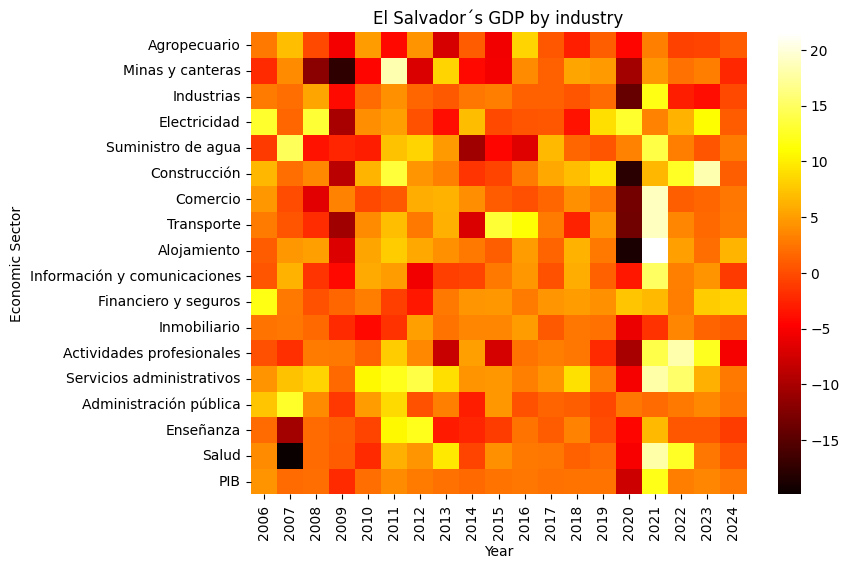

In [151]:
plt.figure(figsize=(8,6))
sns.heatmap(df, annot=False, cmap="hot")
plt.title("El Salvador´s GDP by industry")
plt.xlabel("Year")
plt.ylabel("Economic Sector")